In [1]:
#from IPython.core.display import display, HTML
#display(HTML("<style>.container { width:90% !important; }</style>"))
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
import glob

In [2]:
mpl.rcParams['font.size'] = 18
#%matplotlib notebook
#import matplotlib as mpl
import os
import sys
import math
from datetime import datetime
import time
import pandas as pd
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import seaborn as sb
import scipy
from scipy.optimize import curve_fit
#import sympy as sp
#from labellines import labelLine, labelLines
#from matplotlib.lines import Line2D

from scipy.optimize import curve_fit, leastsq
#import matplotlib.patches as patches

In [3]:
import tfs
data_frame = tfs.read('/Users/admin/Desktop/Cern_stuff/New_sim/twiss_ua9_2018_fl_no_sfx.tfs')

def read_file_trj(fname):
    columns = "NCASE IJ IONZ IONA PLA X Y Z TXX TYY TZZ WEIGHT LLOUSE ISAMPLE NEWREG NPASSAGE LTRACK ZLAST".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, skiprows=1)
    
#     # convert to mm
#     df['X']    = df['X'] * 10.
#     df['Y']    = df['Y'] * 10.
#     df['ZSCO'] = df['ZSCO'] * 10.
    
    
    df['count'] = df.groupby(['NCASE'])['LTRACK'].transform('count')
    return df

def read_file_flka(fname):
    columns = "XFLK YFLK ZFLK TXFLK TYFLK TZFLK PMOFLK TKEFLK".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, skiprows=2)
    
#     # convert to mm
#     df['X']    = df['X'] * 10.
#     df['Y']    = df['Y'] * 10.
#     df['ZSCO'] = df['ZSCO'] * 10.
    
    
#    df['count'] = df.groupby(['NCASE'])['LTRACK'].transform('count')
    return df

def read_file_norm(fname):
    columns = "CSIB_X CSIBXP CSIB_Y CSIBYP CSIDSP".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, skiprows=2)
    
#     # convert to mm
#     df['X']    = df['X'] * 10.
#     df['Y']    = df['Y'] * 10.
#     df['ZSCO'] = df['ZSCO'] * 10.
    
    
#    df['count'] = df.groupby(['NCASE'])['LTRACK'].transform('count')
    return df

def read_file_real(fname):
    columns = "XX XP YY YP PPART".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, skiprows=2)
    
#     # convert to mm
#     df['X']    = df['X'] * 10.
#     df['Y']    = df['Y'] * 10.
#     df['ZSCO'] = df['ZSCO'] * 10.
    
    
#    df['count'] = df.groupby(['NCASE'])['LTRACK'].transform('count')
    return df

def loop_dir (basedir, pattern, fun, *args):

    pattern = basedir + '/' + pattern
    frames = []
    print (pattern)
    for i, fname in enumerate( glob.iglob(pattern) ):
        print (i,fname)

        if len(args) == 0:
            frame = fun(fname)
        elif len(args) == 1:
            frame = fun(fname, args[0])

        frame = frame.reset_index()
        frame['IFILE'] = i
        frame = frame.set_index(['IFILE','NCASE'])

        frames.append( frame )

    print("Files processed %d"%(len(frames)))
    if len(frames) == 0: return

    df = pd.concat(frames)
    print ("#", len(df))
    return df

def loop_dir_coord (basedir, pattern, fun, *args):

    pattern = basedir + '/' + pattern
    frames = []
    print (pattern)
    for i, fname in enumerate( glob.iglob(pattern) ):
        print (i,fname)

        if len(args) == 0:
            frame = fun(fname)
        elif len(args) == 1:
            frame = fun(fname, args[0])

        frame = frame.reset_index()
        frame['IFILE'] = i
        frame = frame.set_index(['IFILE',frame.index])

        frames.append( frame )

    print("Files processed %d"%(len(frames)))
    if len(frames) == 0: return

    df = pd.concat(frames)
    print ("#", len(df))
    return df

def read_file_cry(fname):
    columns = "NCASE JTRACK X Y ZSCO TXCRY TYCRY TZCRY CXTRCK CYTRCK INITX KICK PTOT DELTEN KCHNNL ISTATE NPASSAGE".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0)
    
    # convert to mm
    #df['X']    = df['X'] * 10.
    #df['Y']    = df['Y'] * 10.
    #df['ZSCO'] = df['ZSCO'] * 10.
    
    
    df['count'] = df.groupby(['NCASE'])['JTRACK'].transform('count')
    return df

def read_file_mgdrw(fname):
    columns = "NCASE JTRACK IZ IA XSCO YSCO ZSCO CXTRCK CYTRCK PTOT LTRACK NPASSAGE".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0)
    
    # convert to mm
    #df['X']    = df['X'] * 10.
    #df['Y']    = df['Y'] * 10.
    #df['ZSCO'] = df['ZSCO'] * 10.
    
    
    df['count'] = df.groupby(['NCASE'])['JTRACK'].transform('count')
    return df

def read_file_99(fname, sigma_res=0):
    columns = "NCASE ICODE ICRYST KCHNNL Z ANG0 ISTATE".split()
    #df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, header=1)
    
    #columns = "NCASE ICODE ICRYST KCHNNL Z ANG0 ISTATE".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, skiprows=1)
    
    
    #print(df)
    # convert to mm
    #df['X']    = df['X'] * 10.
    #df['Y']    = df['Y'] * 10.
    #df['ZSCO'] = df['ZSCO'] * 10.
    
    #if sigma_res != 0:
     #   df['ANG0'] += np.random.normal(0, sigma_res, df.shape[0])
#         df['Y'] += np.random.normal(0, sigma_res, df.shape[0])

   # df['count'] = df.groupby(['NCASE'])['ICODE'].transform('count')
    return df
#	index	ICODE	ICRYST	KCHNNL	Z	ANG0	count

def read_file_98(fname, sigma_res=0):
    columns = "NCASE ICODE REG Z".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, header=None)
    #print(df)
    # convert to mm
    #df['X']    = df['X'] * 10.
    #df['Y']    = df['Y'] * 10.
    #df['ZSCO'] = df['ZSCO'] * 10.
    
    #if sigma_res != 0:
     #   df['ANG0'] += np.random.normal(0, sigma_res, df.shape[0])
#         df['Y'] += np.random.normal(0, sigma_res, df.shape[0])

    #df['count'] = df.groupby(['NCASE'])['ICODE'].transform('count')
    return df
#	index	ICODE	ICRYST	KCHNNL	Z	ANG0	count

def read_file_96(fname, sigma_res=0):
    columns = "NCASE ICODE REG ETRACK Z".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, header=None)

    #df['count'] = df.groupby(['ICODE']).transform('count')
    return df

def read_file_86(fname, sigma_res=0):
    columns = "NCASE XX YY XP YP PLA SPAUSR(1) ISPUSR(1) LTRACK NPASSAGE".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, header=None)
    return df

def read_file_84(fname, sigma_res=0):
    columns = "NCASE IJ PLA XX YY ZZ TXX TYY WEE LLOUSE ISPUSR(1) NEWREG NPASSAGE LTRACK".split()
    df = pd.read_csv(fname, names=columns, sep='\s+', index_col=0, header=None)
    return df


In [4]:
#dirname = '/Users/admin/Desktop/New_sim/TCSM_ext_geo_0110_2/run_*' 
#dirname = '/Users/admin/Desktop/New_sim/TCSM_primary_only/run_*'
#dirname = '/Users/admin/Desktop/New_sim/TCSM_prim_and_secondary/run_*'
#dirname = '/Users/admin/Desktop/New_sim/TCSM_prim_and_secondary_Z0/run_*'

#dirname = '/Users/admin/Desktop/New_sim/TCSM_secondary_changeTACW/run_*'

#dirname = '/Users/admin/Desktop/New_sim/TCSM_secondary_add97/run_*' #PART-THR: 250

#dirname = '/Users/admin/Desktop/New_sim/TCSM_secondary_add97_2/run_*'#PART-THR: 265

#dirname = '/Users/admin/Desktop/New_sim/TCSM_97_1210_1/run_*' #Latest

#dirname = '/Users/admin/Desktop/New_sim/TCSM_96_1310_2/run_*' #THIS ONE IS THE CORRECT FILE FOR TCSM IN, PART-THR 250



#NOW REDO SIMULATION FOR TACW/TCSM WITH PART-THR 200 GeV and do lossmaps
#dirname = '/Users/admin/Desktop/New_sim/TACW_THR200/run_*'
#dirname = '/Users/admin/Desktop/New_sim/TACW_THR200_Z_old/run_*'
#dirname = '/Users/admin/Desktop/New_sim/TCSM_THR200/run_*'


#dirname = '/Users/admin/Desktop/New_sim/TACW_THR200_Z_local/run_*'

dirname = '/Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_*'
#dirname = '/Users/admin/Desktop/New_sim/TACW_THR200_mod98/run_*'



#df_flk = loop_dir_coord(dirname,'lss5-double_exp001_flka_coord.dat',read_file_flka)
#df_nrm = loop_dir_coord(dirname,'lss5-double_exp001_norm_coord.dat',read_file_norm)
df_rea = loop_dir_coord(dirname,'lss5-double_exp001_real_coord.dat',read_file_real)

df_trj = loop_dir(dirname,'lss5-double_exp001_usrmed.dat',read_file_trj)

df_60 = loop_dir(dirname,'lss5-double_exp001_fort.60',read_file_mgdrw); #Enter crystal
df_61 = loop_dir(dirname,'lss5-double_exp001_fort.61',read_file_mgdrw); #Exit crystal

df_cry = loop_dir(dirname,'lss5-double_exp001_fort.51',read_file_cry);


df_99 = loop_dir(dirname,'lss5-double_exp001_fort.99',read_file_99) #NI CRY
df_98 = loop_dir(dirname,'lss5-double_exp001_fort.98',read_file_98) #NI absorber
df_96 = loop_dir(dirname,'lss5-double_exp001_fort.96',read_file_96)
df_86 = loop_dir(dirname,'lss5-double_exp001_fort.86',read_file_86)
df_84 = loop_dir(dirname,'lss5-double_exp001_fort.84',read_file_84)



#df_wht = loop_dir(dirname,'lss5-double_exp001_fort.24',read_file_mgdrw) can't read
df_40 = loop_dir(dirname,'lss5-double_exp001_fort.40',read_file_mgdrw) #Enter TCSM
df_41 = loop_dir(dirname,'lss5-double_exp001_fort.41',read_file_mgdrw) #Exit TCSM
df_42 = loop_dir(dirname,'lss5-double_exp001_fort.42',read_file_mgdrw) #Enter TACW 57 files, 72 rows
df_43 = loop_dir(dirname,'lss5-double_exp001_fort.43',read_file_mgdrw)

df_new = pd.merge(df_cry, df_trj,left_index=True, right_index=True, suffixes=('_cry','_tcsm'))
df_tcsm = pd.merge(df_cry, df_98,left_index=True, right_index=True, suffixes=('_cry','_tcsm'))
#df_new3 = pd.merge(df_98, df_cry,left_index=True, right_index=True, suffixes=('_98','_cry'))

/Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_*/lss5-double_exp001_real_coord.dat
0 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_023/lss5-double_exp001_real_coord.dat
1 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_024/lss5-double_exp001_real_coord.dat
2 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_012/lss5-double_exp001_real_coord.dat
3 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_015/lss5-double_exp001_real_coord.dat
4 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_041/lss5-double_exp001_real_coord.dat
5 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_079/lss5-double_exp001_real_coord.dat
6 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_046/lss5-double_exp001_real_coord.dat
7 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_084/lss5-double_exp001_real_coord.dat
8 /Users/admin/Desktop/Cern_stuff/New_sim

89 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_034/lss5-double_exp001_real_coord.dat
90 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_002/lss5-double_exp001_real_coord.dat
91 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_005/lss5-double_exp001_real_coord.dat
92 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_051/lss5-double_exp001_real_coord.dat
93 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_056/lss5-double_exp001_real_coord.dat
94 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_069/lss5-double_exp001_real_coord.dat
95 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_060/lss5-double_exp001_real_coord.dat
96 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_094/lss5-double_exp001_real_coord.dat
97 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_093/lss5-double_exp001_real_coord.dat
98 /Users/admin/Desktop/Cern

71 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_017/lss5-double_exp001_usrmed.dat
72 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_028/lss5-double_exp001_usrmed.dat
73 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_021/lss5-double_exp001_usrmed.dat
74 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_026/lss5-double_exp001_usrmed.dat
75 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_019/lss5-double_exp001_usrmed.dat
76 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_004/lss5-double_exp001_usrmed.dat
77 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_003/lss5-double_exp001_usrmed.dat
78 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_035/lss5-double_exp001_usrmed.dat
79 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_032/lss5-double_exp001_usrmed.dat
80 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCS

63 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_072/lss5-double_exp001_fort.60
64 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_086/lss5-double_exp001_fort.60
65 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_081/lss5-double_exp001_fort.60
66 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_075/lss5-double_exp001_fort.60
67 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_088/lss5-double_exp001_fort.60
68 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_043/lss5-double_exp001_fort.60
69 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_044/lss5-double_exp001_fort.60
70 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_010/lss5-double_exp001_fort.60
71 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_017/lss5-double_exp001_fort.60
72 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_028/lss5-double_exp00

56 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_073/lss5-double_exp001_fort.61
57 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_027/lss5-double_exp001_fort.61
58 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_018/lss5-double_exp001_fort.61
59 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_020/lss5-double_exp001_fort.61
60 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_016/lss5-double_exp001_fort.61
61 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_029/lss5-double_exp001_fort.61
62 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_011/lss5-double_exp001_fort.61
63 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_072/lss5-double_exp001_fort.61
64 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_086/lss5-double_exp001_fort.61
65 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_081/lss5-double_exp00

45 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_037/lss5-double_exp001_fort.51
46 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_030/lss5-double_exp001_fort.51
47 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_039/lss5-double_exp001_fort.51
48 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_006/lss5-double_exp001_fort.51
49 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_001/lss5-double_exp001_fort.51
50 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_045/lss5-double_exp001_fort.51
51 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_089/lss5-double_exp001_fort.51
52 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_042/lss5-double_exp001_fort.51
53 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_074/lss5-double_exp001_fort.51
54 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_080/lss5-double_exp00

9 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_048/lss5-double_exp001_fort.98
10 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_077/lss5-double_exp001_fort.98
11 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_083/lss5-double_exp001_fort.98
12 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_014/lss5-double_exp001_fort.98
13 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_013/lss5-double_exp001_fort.98
14 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_025/lss5-double_exp001_fort.98
15 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_022/lss5-double_exp001_fort.98
16 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_049/lss5-double_exp001_fort.98
17 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_082/lss5-double_exp001_fort.98
18 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_076/lss5-double_exp001

# 1288943
/Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_*/lss5-double_exp001_fort.96
0 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_023/lss5-double_exp001_fort.96
1 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_024/lss5-double_exp001_fort.96
2 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_012/lss5-double_exp001_fort.96
3 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_015/lss5-double_exp001_fort.96
4 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_041/lss5-double_exp001_fort.96
5 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_079/lss5-double_exp001_fort.96
6 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_046/lss5-double_exp001_fort.96
7 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_084/lss5-double_exp001_fort.96
8 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_070/lss5-double_exp001_fo

99 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_058/lss5-double_exp001_fort.96
Files processed 100
# 1290988
/Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_*/lss5-double_exp001_fort.86
0 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_023/lss5-double_exp001_fort.86
1 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_024/lss5-double_exp001_fort.86
2 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_015/lss5-double_exp001_fort.86
3 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_079/lss5-double_exp001_fort.86
4 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_046/lss5-double_exp001_fort.86
5 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_084/lss5-double_exp001_fort.86
6 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_070/lss5-double_exp001_fort.86
7 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_048/

5 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_079/lss5-double_exp001_fort.84
6 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_046/lss5-double_exp001_fort.84
7 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_084/lss5-double_exp001_fort.84
8 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_070/lss5-double_exp001_fort.84
9 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_048/lss5-double_exp001_fort.84
10 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_077/lss5-double_exp001_fort.84
11 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_083/lss5-double_exp001_fort.84
12 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_014/lss5-double_exp001_fort.84
13 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_013/lss5-double_exp001_fort.84
14 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_025/lss5-double_exp001_for

3 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_015/lss5-double_exp001_fort.40
4 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_041/lss5-double_exp001_fort.40
5 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_079/lss5-double_exp001_fort.40
6 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_046/lss5-double_exp001_fort.40
7 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_084/lss5-double_exp001_fort.40
8 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_070/lss5-double_exp001_fort.40
9 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_048/lss5-double_exp001_fort.40
10 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_077/lss5-double_exp001_fort.40
11 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_083/lss5-double_exp001_fort.40
12 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_014/lss5-double_exp001_fort.

93 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_056/lss5-double_exp001_fort.40
94 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_069/lss5-double_exp001_fort.40
95 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_060/lss5-double_exp001_fort.40
96 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_094/lss5-double_exp001_fort.40
97 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_093/lss5-double_exp001_fort.40
98 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_067/lss5-double_exp001_fort.40
99 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_058/lss5-double_exp001_fort.40
Files processed 100
# 1122699
/Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_*/lss5-double_exp001_fort.41
0 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_023/lss5-double_exp001_fort.41
1 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/ru

Files processed 100
# 246557
/Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_*/lss5-double_exp001_fort.42
0 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_023/lss5-double_exp001_fort.42
1 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_024/lss5-double_exp001_fort.42
2 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_012/lss5-double_exp001_fort.42
3 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_041/lss5-double_exp001_fort.42
4 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_079/lss5-double_exp001_fort.42
5 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_084/lss5-double_exp001_fort.42
6 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_070/lss5-double_exp001_fort.42
7 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_083/lss5-double_exp001_fort.42
8 /Users/admin/Desktop/Cern_stuff/New_sim/Multiturn/2022_MT_TCSM/run_014/ls

In [5]:
df_86

XX        YY        XP        YP        PLA  SPAUSR(1)  \
IFILE NCASE                                                                 
0     38    -4.532028  0.591959  0.000409  0.000108  269.36327   9157.325   
      7279  -4.383364  0.924986  0.000335  0.000177  269.40919   9157.325   
      9566  -4.167899  0.006788  0.000392  0.000008  269.50472   9157.325   
1     3920  -4.403254  1.179749  0.000648  0.000249  268.85508   9157.325   
2     1031  -4.277437 -0.684558  0.000809 -0.000129  267.58465   9157.325   
...               ...       ...       ...       ...        ...        ...   
87    9757  -4.300737 -0.503576  0.000425 -0.000103  269.68521   9157.325   
88    1685  -4.377560  0.134325  0.000671  0.000031  268.51909   9157.325   
      4440  -4.171715 -0.521963  0.000945 -0.000112  268.31141      0.000   
      5809  -4.381071  0.056410  0.000888  0.000008  269.72371   9157.325   
89    3604  -4.533258  0.336423  0.000421  0.000058  269.36549   9157.325   

             ISPUSR(1)  LTRACK  NPASSAGE  
IFILE NCASE                               
0     38             0       1         2  
      7279           0       1         2  
      9566           0       1         4  
1     3920           0       1         2  
2     1031           0       1         1  
...                ...     ...       ...  
87    9757           0       1         1  
88    1685           0       2         6  
      4440           0       1         2  
      5809           0       1         5  
89    3604           0       1         2  

[219 rows x 9 columns]

In [6]:
len(df_trj.loc[df_trj['LTRACK']==1]), len(df_96.loc[(df_96['ICODE']==11)&(df_96['REG']==329)]),\
len(df_96.loc[(df_96['ICODE']==11)&(df_96['REG']==36)]), len(df_96.loc[(df_96['ICODE']==12)])

(74935, 0, 0, 0)

In [7]:
len(df_trj.loc[df_trj['LTRACK']==1]), len(df_98.loc[df_98['ICODE']==101]), len(df_99.loc[df_99['ICODE']==101]),\
len(df_96.loc[(df_96['ICODE']==12)])

(74935, 919508, 1335, 0)

In [8]:
print('TCSM\n\nUSRMED + Crystal (fort.99) + Absorber (fort.98) + >10 turns (fort.84) + fort.86 (LTRACK=1)\n')


print('=>',len(df_trj.loc[df_trj['LTRACK']==1])+len(df_99.loc[df_99['ICODE']==101])+len(df_98.loc[df_98['ICODE']==101])\
+len(df_96[df_96['ICODE']==12])+len(df_84)+len(df_86.loc[df_86['LTRACK']==1]),'primaries')

print('\nfort.86:',len(df_86),'particles. 157 primaries counted by brute force')

TCSM

USRMED + Crystal (fort.99) + Absorber (fort.98) + >10 turns (fort.84) + fort.86 (LTRACK=1)

=> 1000000 primaries

fort.86: 219 particles. 157 primaries counted by brute force


In [9]:
len(df_84),len(df_84.loc[df_84['LTRACK']==1]),len(df_86), len(df_96[df_96['ICODE']==12])

(4065, 4065, 219, 0)

In [10]:
#When moving the TACW up in the opposite side of the collimator. The primaries hitting the TACW reduce to 6 
#and total amount of missing particles becomes 63
#Now the losses are not only in the TACW region but also at 4940.69

In [11]:
#_0110_2: 999721
#prim+secondary: 999721, missing 279
#prim_only: 999935, missing 65

#HAVING MODIFIED read_99 TO INCLUDE FIRST ELEMENT ALSO
#_0110_2: 999787 missing 213
#prim+secondary: 999787, missing 213
#prim_only: 1000000, missing 0

#HAVING MODIFIED read_99 AND read_98 TO INCLUDE FIRST ELEMENT ALSO
#_0110_2: 999931, missing 69
#prim+secondary: 999931, missing 69
#prim_only: 1000000, missing 0

Before we were missing 69 primaries. 

Turns out that the fort.42 we are producing (particles entering TACW) has 72 particles 11 of which are primaries, and they should not be there. They are all hitting in the region TACW51998 11411.975 - 11471.081.

We then retract both the TACW in the opposite direction so that it is further from the beamline (both from -0.07 to 0.14)

Now the same file has 14 particles with 6 primaries. 4 of them are hitting the TACW51797 and the 2 others together with the 8 secondaries the TACW51998 

So TACW51797 should have remained at -0.07 since there were no losses before. But the particles hitting the TACW51998 before are now just again unaccounted for.

I will move back TACW51797. Since we produce a fort.42 but not a fort.43 it means that the particles are entering TACW but not leaving. So they interact inside the TACW0 but they do not appear in the fort.98 which means that they must be interacting with a different interaction than 101/100.
Try to edit the code responsible for fort.98 to include more interactions:
Now there's in total more interactions in fort.98 buth they are spread out in 101/100/0 and fewer 101. 

Made edits to mgdraw. Removed TACW_JAW from USRINI so that they appear in the USRMED. Increased the particle threshold for stopping particles so they appear in a newly defined fort.97.
The fort.97 is not produced but some particles (neutrons) are being stopped as cen be read in the output file.
When using PART-THR = -250 GeV we get too many particles 1010717, and we produce some ICODE 0.

When using PART-THR = -265 GeV we get too few particles 999337, but we produce also ICODE 104/105 and no 0.
In both cases still no fort.97 produced. So raising the PART-THR means more particles are stopped but not stored. And these particles must be primaries according to fort.98 in mgdraw.

# All primaries found:
Having reduced PARTTHR to -200 GeV, first for TCSM we have all primaries in USRMED + fort.96 11 (inelastics).
For TACW 6 particles are stopped, and we have all primaries in USRMED + fort.96 11 + fort.96 12 (6).
Now we reproduce the lossmaps and add the losses in the map

In [12]:
#63 missing with changeTACW

#10717 too many with add_97: No 101 in TACW0, but now in USRMED PART-THR = -250 GeV
#663 missing with add_97_2: No 101 in TACW0, but now in USRMED PART-THR = -265 GeV

#Thus increasing PART-THR makes mores primaries disappear unaccounted for. Because there are 0 101 in TACW0 now.

Text(0.5, 1.0, 'Energies of stopped primaries ICODE 11')

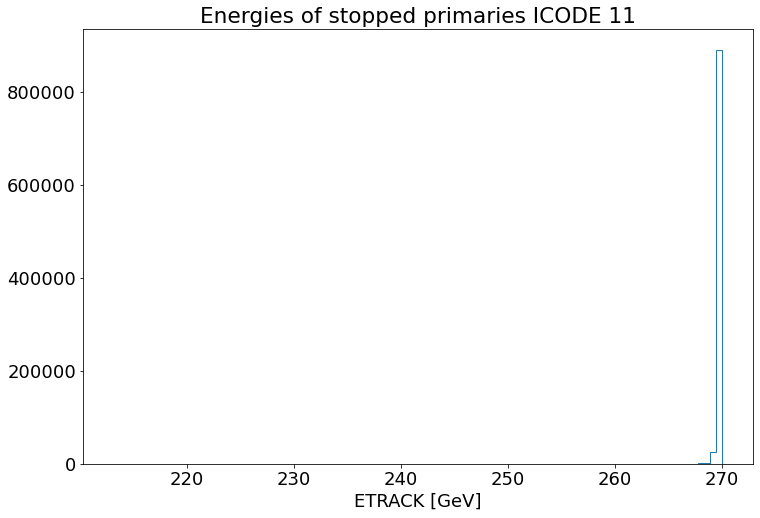

In [13]:
fig,ax=plt.subplots(figsize=(12,8))
plt.hist(df_96.loc[df_96['ICODE']==11,'ETRACK'],bins=101,histtype='step');
plt.xlabel('ETRACK [GeV]')
plt.title('Energies of stopped primaries ICODE 11')

In [14]:
df_trj['LTRACK'].value_counts()

1    74935
2    33690
3     2611
4      186
5       12
Name: LTRACK, dtype: int64

In [15]:
df_98['ICODE'].value_counts()

101    919508
100    369435
Name: ICODE, dtype: int64

Carbon Absorber:

Number of NI in CRY: 1335

Number of NI in TCSM: 919508

Number of primaries in rest of aperture: 74935

Number of Gen ≥ 2 particles: 36499

Number of primaries reaching end of geometry: 0


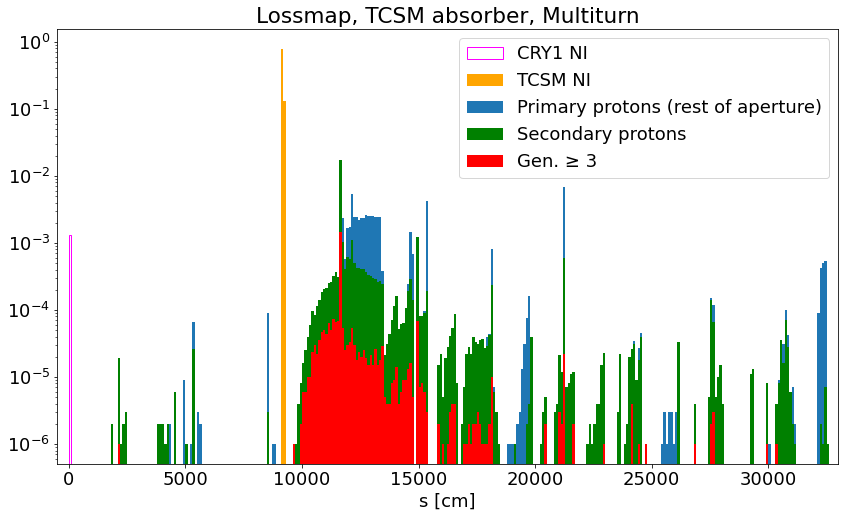

In [16]:
#TCSM
fig,ax=plt.subplots(figsize=(14,8))
bins = np.linspace(0,35000,351)

z1 = len(df_99.loc[df_99['ICODE']==101,'Z'])
w1 = np.full((z1),1/1e6)
plt.hist(df_99.loc[df_99['ICODE']==101,'Z'],bins=bins,label='CRY1 NI',color='magenta',log=True,histtype='step',stacked=True,weights=w1);

z2 = len(df_98.loc[df_98['ICODE']==101,'Z'])
w2 = np.full((z2),1/1e6)
plt.hist(df_98.loc[df_98['ICODE']==101,'Z'],bins=bins,label='TCSM NI',color='orange',log=True,histtype='bar',stacked=True,weights=w2);

z3 = len(df_trj.loc[df_trj['LTRACK']==1,'Z'])
w3 = np.full((z3),1/1e6)
plt.hist(df_trj.loc[df_trj['LTRACK']==1,'Z'],bins=bins,label='Primary protons (rest of aperture)',log=True,histtype='bar',stacked=True,weights=w3);

z4 = len(df_trj.loc[df_trj['LTRACK']==2,'Z'])
w4 = np.full((z4),1/1e6)
plt.hist(df_trj.loc[df_trj['LTRACK']==2,'Z'],bins=bins,label='Secondary protons',color='green',log=True,histtype='bar',stacked=True,weights=w4);

z5 = len(df_trj.loc[df_trj['LTRACK'].isin([3,4,5]),'Z'])
w5 = np.full((z5),1/1e6)
plt.hist(df_trj.loc[df_trj['LTRACK'].isin([3,4,5]),'Z'],bins=bins,label='Gen. ≥ 3',color='red',log=True,histtype='bar',stacked=True,weights=w5);


plt.xlim(-500,33000)
plt.xlabel('s [cm]')
plt.title('Lossmap, TCSM absorber, Multiturn')
plt.legend()
tot = len(df_trj.loc[df_trj['LTRACK']==1,'Z'])+len(df_96.loc[df_96['ICODE']==11,'Z'])
#print(f'USRMED primaries (473211), USRMED secondaries (19017), fort.96 ICODE11 (526789)')
#print('\nUSRMED primaries + fort.96 ICODE11:', tot)

prim_rest_geo = len(df_trj.loc[(df_trj['LTRACK']==1) & (df_trj['Z']>33000),'Z'])
print('Carbon Absorber:\n')
print('Number of NI in CRY:',z1)
print('\nNumber of NI in TCSM:',z2)
print('\nNumber of primaries in rest of aperture:',z3-prim_rest_geo)
print('\nNumber of Gen ≥ 2 particles:',z4+z5)
print('\nNumber of primaries reaching end of geometry:',prim_rest_geo)

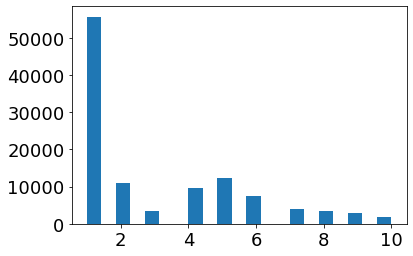

In [17]:
plt.hist(df_trj['NPASSAGE'],bins=21);

In [18]:
z1,z2,z3,z4

(1335, 919508, 74935, 33690)

In [19]:
len(df_98.loc[(df_98['ICODE']==101) & (df_98['Z']<10000),'Z']), len(df_trj.loc[df_trj['LTRACK']==1,'Z']), len(df_trj.loc[df_trj['LTRACK']==2,'Z'])

(919508, 74935, 33690)

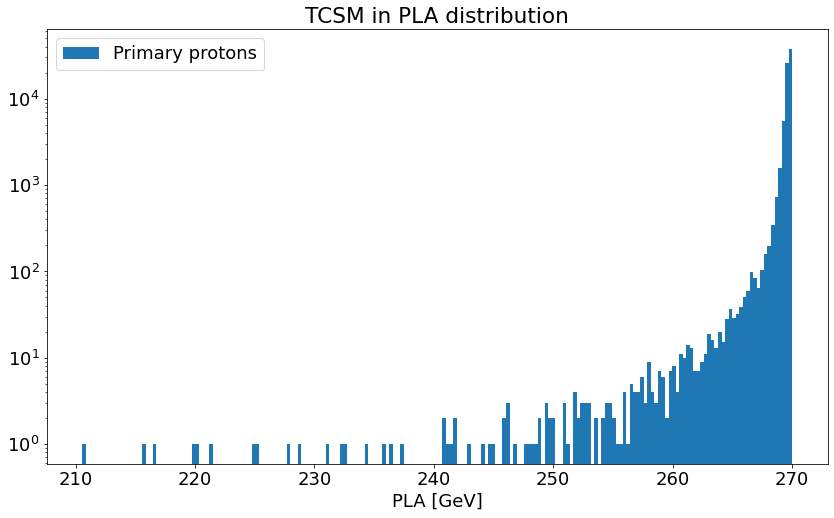

In [20]:
#TCSM
fig,ax=plt.subplots(figsize=(14,8))
plt.hist(df_trj.loc[(df_trj['LTRACK']==1) & (df_trj['Z']<28400),'PLA'],bins=201,label='Primary protons',log=True,histtype='bar',stacked=True);
#plt.hist(df_trj.loc[df_trj['LTRACK']==2,'PLA'],bins=201,label='Secondary protons',color='green',log=True,histtype='step',stacked=True);
#plt.hist(df_96.loc[df_96['ICODE']==11,'ETRACK'],bins=201,label='Inelastic NI',color='magenta',log=True,histtype='step',stacked=True);

#plt.xlim(-500,28600)
plt.xlabel('PLA [GeV]')
plt.title('TCSM in PLA distribution')
plt.legend(loc='upper left')

In [21]:
df_trj['LTRACK'].value_counts()

1    74935
2    33690
3     2611
4      186
5       12
Name: LTRACK, dtype: int64

Text(0.5, 1.0, 'TCSM in, momentum vs z for all particles in aperture')

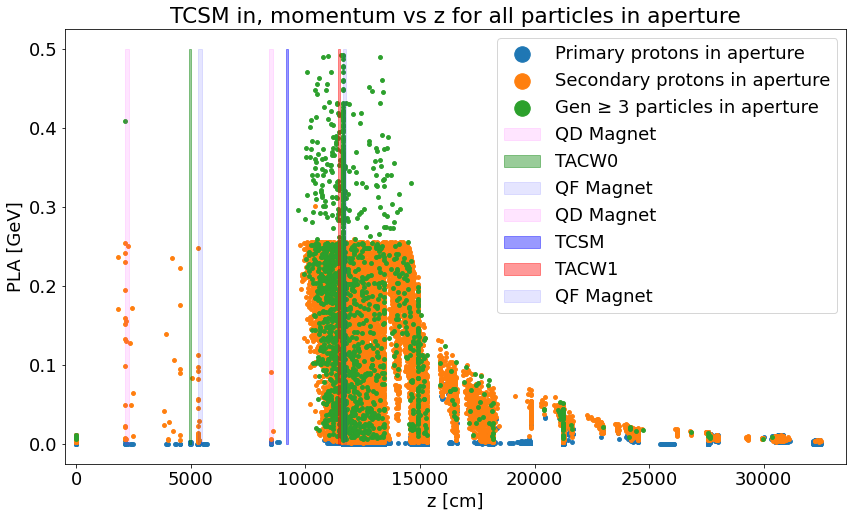

In [22]:
#TCSM
fig,ax=plt.subplots(figsize=(14,8))
plt.scatter(df_trj.loc[df_trj['LTRACK']==1,'Z'],1-df_trj.loc[df_trj['LTRACK']==1,'PLA']/270,s=15,label='Primary protons in aperture')
plt.scatter(df_trj.loc[df_trj['LTRACK']==2,'Z'],1-df_trj.loc[df_trj['LTRACK']==2,'PLA']/270,s=15,label='Secondary protons in aperture')
plt.scatter(df_trj.loc[df_trj['LTRACK'].isin([3,4,5]),'Z'],1-df_trj.loc[df_trj['LTRACK'].isin([3,4,5]),'PLA']/270,s=15,label='Gen ≥ 3 particles in aperture')


plt.fill_between([2100,2300], [0],[0.5], color='magenta', alpha=0.1,label='QD Magnet')
plt.fill_between([4930,5010], [0],[0.5], color='green', alpha=0.4,label='TACW0')
plt.fill_between([5300,5500], [0],[0.5], color='blue', alpha=0.1,label='QF Magnet')
plt.fill_between([8400,8600], [0],[0.5], color='magenta', alpha=0.1,label='QD Magnet')
plt.fill_between([9150,9225], [0],[0.5], color='blue', alpha=0.4,label='TCSM')
plt.fill_between([11400,11485], [0],[0.5], color='red', alpha=0.4,label='TACW1')
plt.fill_between([11650,11750], [0],[0.5], color='blue', alpha=0.1,label='QF Magnet')


#plt.fill_between([11700,15000], [0],[0.6], color='red', alpha=0.15,label='Start of bend (QF)')

plt.xlim(-500,33600)
plt.ylabel('PLA [GeV]')
plt.xlabel('z [cm]')
plt.legend(scatterpoints=1,markerscale=4,loc='upper right')

plt.title('TCSM in, momentum vs z for all particles in aperture')

In [23]:
df_trj.loc[df_trj['LTRACK']==2,'Z'].count()

33690

In [24]:
df_trj.loc[df_trj['LTRACK']==2,'Z'].count()

33690

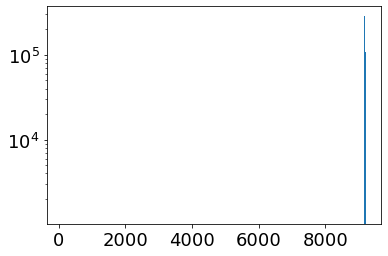

In [25]:
#For TCSM all NI in absorber (fort.98) only in TCSM
fig,ax = plt.subplots()
plt.hist(df_96.loc[(df_96['ICODE']==11),'Z'],bins=801,log=True);
#plt.xlim(11000,12000)

In [26]:
merge_40 = pd.merge(df_cry, df_40,left_index=True, right_index=True,how='right', suffixes=('_cry','_tcsm'))
print(len(merge_40), len(df_40))
merge_40.columns

1130963 1122699


Index(['JTRACK_cry', 'X', 'Y', 'ZSCO_cry', 'TXCRY', 'TYCRY', 'TZCRY',
       'CXTRCK_cry', 'CYTRCK_cry', 'INITX', 'KICK', 'PTOT_cry', 'DELTEN',
       'KCHNNL', 'ISTATE', 'NPASSAGE_cry', 'count_cry', 'JTRACK_tcsm', 'IZ',
       'IA', 'XSCO', 'YSCO', 'ZSCO_tcsm', 'CXTRCK_tcsm', 'CYTRCK_tcsm',
       'PTOT_tcsm', 'LTRACK', 'NPASSAGE_tcsm', 'count_tcsm'],
      dtype='object')

/var/folders/kc/46w6mj1x0h3807l6v8vm8z_c0000gn/T/ipykernel_90242/591270103.py:9: RuntimeWarning: divide by zero encountered in true_divide
  ratio  = np.divide(hist_ch.T, hist.T)
/var/folders/kc/46w6mj1x0h3807l6v8vm8z_c0000gn/T/ipykernel_90242/591270103.py:9: RuntimeWarning: invalid value encountered in true_divide
  ratio  = np.divide(hist_ch.T, hist.T)
/var/folders/kc/46w6mj1x0h3807l6v8vm8z_c0000gn/T/ipykernel_90242/591270103.py:14: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  cbar = plt.colorbar(mappable=mesh)


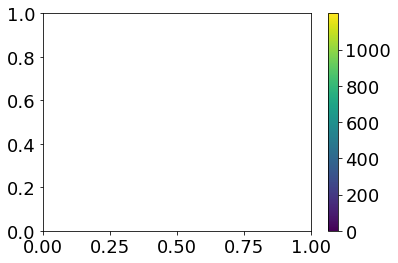

In [27]:
binx = np.linspace(min(df_40['XSCO']),max(df_40['XSCO']),60)
biny = np.linspace(min(merge_40.loc[merge_40['ISTATE']==2,'XSCO']),max(merge_40.loc[merge_40['ISTATE']==2,'XSCO']),60)


hist,_,_ = np.histogram2d(df_40['XSCO'].values,df_40['XSCO'].values,bins=(binx,binx),);
hist_ch,_,_ = np.histogram2d(merge_40.loc[merge_40['ISTATE']==2,'XSCO'].values,merge_40.loc[merge_40['ISTATE']==2,'XSCO'].values,bins=(biny,biny),);


ratio  = np.divide(hist_ch.T, hist.T)

X, Y = np.meshgrid(binx,biny)
mesh = ax.pcolormesh(X, Y, (ratio))

cbar = plt.colorbar(mappable=mesh) 

(-0.2, 0.2)

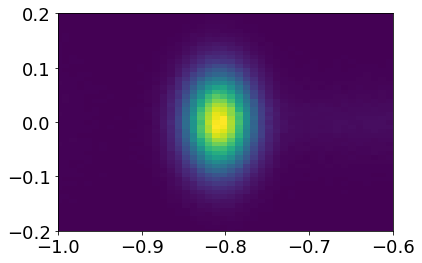

In [28]:
plt.hist2d(df_40['XSCO'],df_40['YSCO'],bins=901);
plt.xlim(-1,-0.6)
plt.ylim(-0.2,0.2)

Text(0.5, 1.0, 'Impact distribution TCSM')

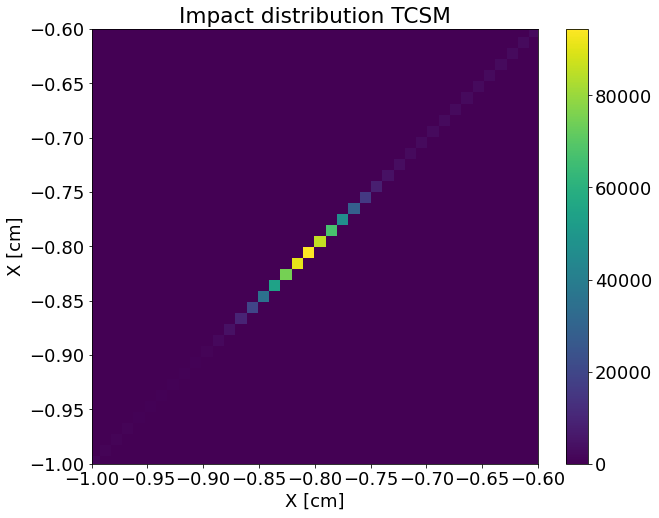

In [29]:
#For TCSM
fig,ax=plt.subplots(figsize=(10,8))
plt.hist2d(df_40['XSCO'],df_40['XSCO'],bins=801, cmap=plt.cm.viridis);
plt.colorbar()
#plt.pcolormesh((df_40['XSCO'],df_40['XSCO']))
#mesh = ax.pcolormesh(X, Y, (ratio))


plt.xlim(-1,-0.6)
plt.ylim(-1,-0.6)
plt.xlabel('X [cm]')
plt.ylabel('X [cm]')
plt.title('Impact distribution TCSM')

Text(0.5, 1.0, 'Impact distribution X TCSM')

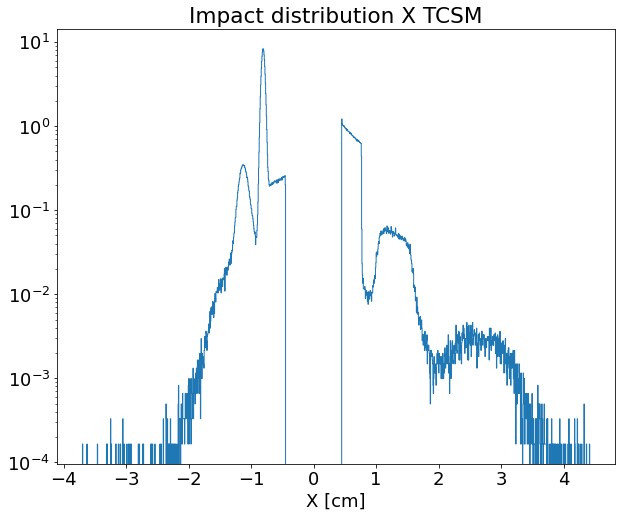

In [30]:
fig,ax=plt.subplots(figsize=(10,8))
plt.hist(df_40['XSCO'],bins=1501,histtype='step',density=True,log=True);
#plt.xlim(-1,-0.6)

plt.xlabel('X [cm]')
plt.title('Impact distribution X TCSM')

In [31]:
merge_40['ISTATE'].value_counts()
merge_40[['NPASSAGE_cry','NPASSAGE_tcsm']]

NPASSAGE_cry  NPASSAGE_tcsm
IFILE NCASE                             
0     1               1.0              1
      2               1.0              1
      2               2.0              1
      2               1.0              2
      2               2.0              2
...                   ...            ...
99    9998            2.0              1
      9998            1.0              2
      9998            2.0              2
      9999            1.0              4
      10000           1.0              5

[1130963 rows x 2 columns]

In [32]:
len(merge_40.loc[(merge_40['ISTATE']==3)])/2001, 652/2

(355.28985507246375, 326.0)

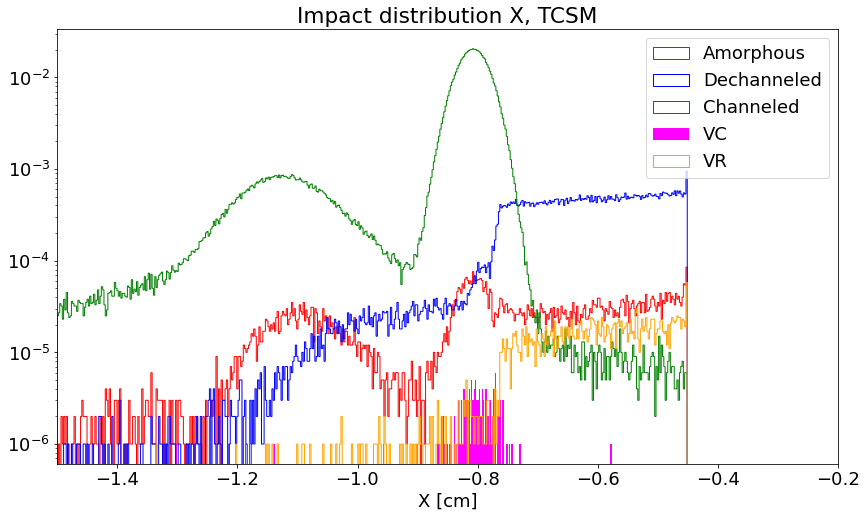

In [33]:
fig,ax =plt.subplots(figsize=(14,8))
impact_bins = np.linspace(-1.5,-0.2,601)

z1 = len(merge_40.loc[(merge_40['ISTATE']==-1) | (merge_40['ISTATE']==0) | (merge_40['ISTATE']==1),'XSCO'])
w1 = np.full((z1),1/1e6)
plt.hist(merge_40.loc[(merge_40['ISTATE']==-1) | (merge_40['ISTATE']==0) | (merge_40['ISTATE']==1),'XSCO'],bins=impact_bins,histtype='step',stacked=True,log=True,color='red',label='Amorphous',weights=w1);

z2 = len(merge_40.loc[(merge_40['ISTATE']==2),'XSCO'])
w2 = np.full((z2),1/1e6)
plt.hist(merge_40.loc[(merge_40['ISTATE']==2),'XSCO'],bins=impact_bins,histtype='step',stacked=True,log=True,color='blue',label='Dechanneled',weights=w2);

z3 = len(merge_40.loc[(merge_40['ISTATE']==3),'XSCO'])
w3 = np.full((z3),1/1e6)
plt.hist(merge_40.loc[(merge_40['ISTATE']==3),'XSCO'],bins=impact_bins,histtype='step',stacked=True,log=True,color='green',label='Channeled',weights=w3);

z4 = len(merge_40.loc[(merge_40['ISTATE']==4),'XSCO'])
w4 = np.full((z4),1/1e6)
plt.hist(merge_40.loc[(merge_40['ISTATE']==4),'XSCO'],bins=impact_bins,histtype='bar',stacked=True,log=True,color='magenta',label='VC',weights=w4);

z5 = len(merge_40.loc[(merge_40['ISTATE']==5),'XSCO'])
w5 = np.full((z5),1/1e6)
plt.hist(merge_40.loc[(merge_40['ISTATE']==5),'XSCO'],bins=impact_bins,histtype='step',stacked=True,log=True,color='orange',label='VR',weights=w5);

#MULTITURN
z6 = len(merge_40.loc[(merge_40['ISTATE']==3) & (merge_40['NPASSAGE_tcsm']>1),'XSCO'])
w6 = np.full((z6),1/1e6)
#plt.hist(merge_40.loc[(merge_40['ISTATE']==3) & (merge_40['NPASSAGE_tacw']>1),'XSCO'],bins=impact_bins,histtype='step',stacked=True,log=True,color='k',label='Channeled MT',weights=w6);

z7 = len(merge_40.loc[(merge_40['ISTATE']==3) & (merge_40['NPASSAGE_tcsm']>2),'XSCO'])
w7 = np.full((z7),1/1e6)
#plt.hist(merge_40.loc[(merge_40['ISTATE']==3) & (merge_40['NPASSAGE_tacw']>2),'XSCO'],bins=impact_bins,histtype='step',stacked=True,log=True,color='magenta',label='Channeled MT',weights=w7);

plt.xlim(-1.5,-0.2)
#plt.xlim(-1.5,1.5)


plt.xlabel('X [cm]')
plt.title('Impact distribution X, TCSM')
plt.legend();

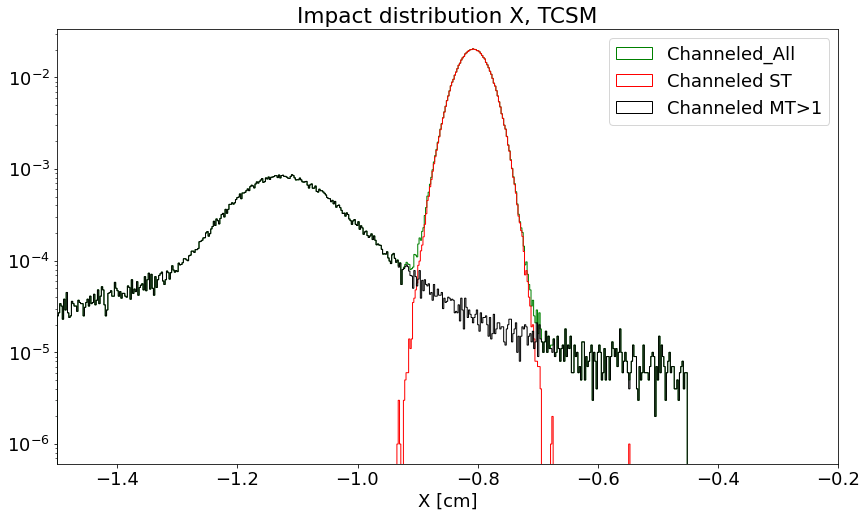

In [34]:
fig,ax =plt.subplots(figsize=(14,8))
impact_bins = np.linspace(-1.5,-0.2,601)

z1 = len(merge_40.loc[(merge_40['ISTATE']==-1) | (merge_40['ISTATE']==0) | (merge_40['ISTATE']==1),'XSCO'])
w1 = np.full((z1),1/1e6)
#plt.hist(merge_40.loc[(merge_40['ISTATE']==-1) | (merge_40['ISTATE']==0) | (merge_40['ISTATE']==1),'XSCO'],bins=impact_bins,histtype='step',stacked=True,log=True,color='red',label='Amorphous',weights=w1);

z2 = len(merge_40.loc[(merge_40['ISTATE']==2),'XSCO'])
w2 = np.full((z2),1/1e6)
#plt.hist(merge_40.loc[(merge_40['ISTATE']==2),'XSCO'],bins=impact_bins,histtype='step',stacked=True,log=True,color='blue',label='Dechanneled',weights=w2);

z3 = len(merge_40.loc[(merge_40['ISTATE']==3),'XSCO'])
w3 = np.full((z3),1/1e6)
plt.hist(merge_40.loc[(merge_40['ISTATE']==3),'XSCO'],bins=impact_bins,histtype='step',stacked=True,log=True,color='green',label='Channeled_All',weights=w3);

z4 = len(merge_40.loc[(merge_40['ISTATE']==4),'XSCO'])
w4 = np.full((z4),1/1e6)
#plt.hist(merge_40.loc[(merge_40['ISTATE']==4),'XSCO'],bins=impact_bins,histtype='bar',stacked=True,log=True,color='magenta',label='VC',weights=w4);

z5 = len(merge_40.loc[(merge_40['ISTATE']==5),'XSCO'])
w5 = np.full((z5),1/1e6)
#plt.hist(merge_40.loc[(merge_40['ISTATE']==5),'XSCO'],bins=impact_bins,histtype='step',stacked=True,log=True,color='orange',label='VR',weights=w5);

z8 = len(merge_40.loc[(merge_40['ISTATE']==3) & (merge_40['NPASSAGE_tcsm']==1),'XSCO'])
w8 = np.full((z8),1/1e6)
plt.hist(merge_40.loc[(merge_40['ISTATE']==3) & (merge_40['NPASSAGE_tcsm']==1),'XSCO'],bins=impact_bins,histtype='step',stacked=True,log=True,color='red',label='Channeled ST',weights=w8);

#MULTITURN
z6 = len(merge_40.loc[(merge_40['ISTATE']==3) & (merge_40['NPASSAGE_tcsm']>1),'XSCO'])
w6 = np.full((z6),1/1e6)
plt.hist(merge_40.loc[(merge_40['ISTATE']==3) & (merge_40['NPASSAGE_tcsm']>1),'XSCO'],bins=impact_bins,histtype='step',stacked=True,log=True,color='k',label='Channeled MT>1',weights=w6);

z7 = len(merge_40.loc[(merge_40['ISTATE']==3) & (merge_40['NPASSAGE_tcsm']>2),'XSCO'])
w7 = np.full((z7),1/1e6)
#plt.hist(merge_40.loc[(merge_40['ISTATE']==3) & (merge_40['NPASSAGE_tcsm']>2),'XSCO'],bins=impact_bins,histtype='step',stacked=True,log=True,color='magenta',label='Channeled MT>2',weights=w7);



plt.xlim(-1.5,-0.2)
#plt.xlim(-1.5,1.5)


plt.xlabel('X [cm]')
plt.title('Impact distribution X, TCSM')
plt.legend();

In [35]:
merge_40['ISTATE'].value_counts()

 3.0    710935
 1.0    184115
 2.0    104784
 0.0     65492
 5.0     55872
-1.0       658
 4.0       122
Name: ISTATE, dtype: int64

In [36]:
[len(merge_40.loc[merge_40['ISTATE']==i])/len(merge_40['ISTATE'])*100 for i in range(-1,6)]

[0.05818050634724567,
 5.7908172062216,
 16.279489249427257,
 9.265024585242841,
 62.861030820636934,
 0.01078726713429175,
 4.940214666615972]

In [37]:
0.07047667862634546+0.004531759822980086+0.01297020914852921

0.08797864759785476

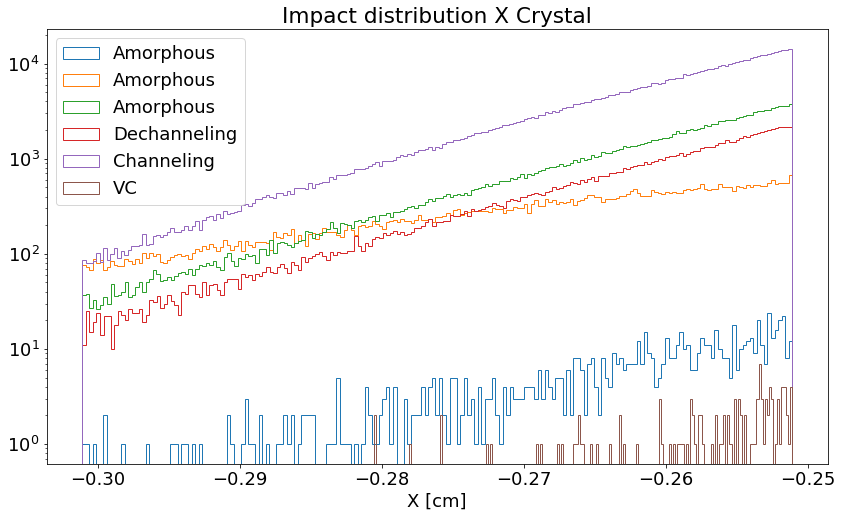

In [38]:
fig,ax =plt.subplots(figsize=(14,8))
for i in range(-1,5):
    plt.hist(df_cry.loc[df_cry['ISTATE']==i,'X'],bins=201,histtype='step',stacked=True,log=True,label=i);

plt.xlabel('X [cm]')
plt.title('Impact distribution X Crystal')
plt.legend(['Amorphous','Amorphous','Amorphous','Dechanneling','Channeling','VC'],loc='upper left');

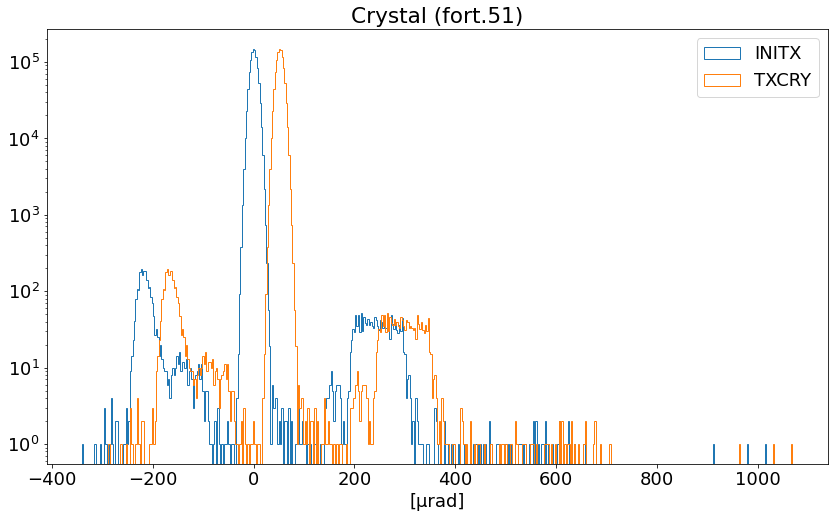

In [39]:
fig,ax=plt.subplots(figsize=(14,8))

#CXTRCK: Exit angle of region
#What is TXCRY?

#plt.hist(df_60['CXTRCK']*1e6,bins=501,histtype='step',log=True); #Crystal entry, mean of distribution is crystals bending angle
#plt.hist(df_61['CXTRCK']*1e6,bins=501,histtype='step',log=True); #Crystal exit, identical to df_cry CXTRCK


plt.hist(df_cry['INITX']*1e6,bins=501,histtype='step',log=True,label='INITX'); #Initial angle
plt.hist(df_cry['TXCRY']*1e6,bins=501,histtype='step',log=True,label='TXCRY'); #Identical to df_60 CXTRCK

#plt.hist(df_cry['KICK']*1e6,bins=501,histtype='step',log=True);
#plt.hist(df_cry['CXTRCK']*1e6,bins=501,histtype='step',log=True); #Mirrored to KICK

plt.title('Crystal (fort.51)')
plt.xlabel('[µrad]')
plt.legend();

Text(0.5, 0, '[µrad]')

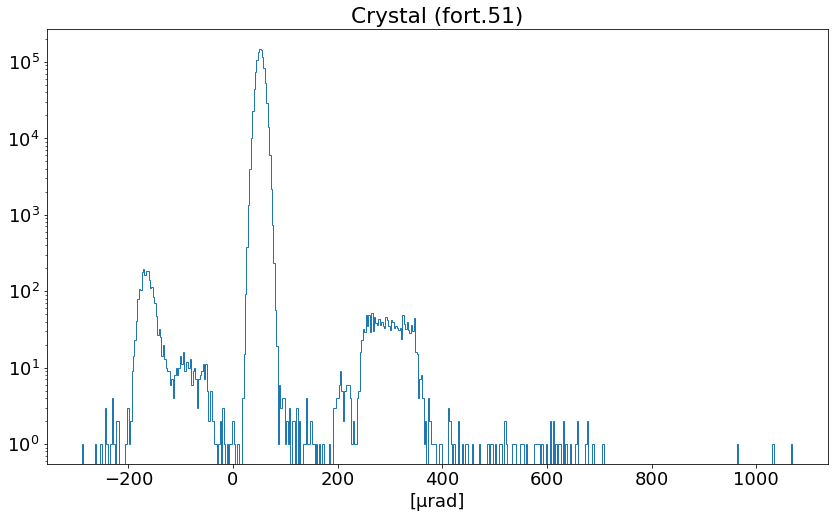

In [40]:
fig,ax=plt.subplots(figsize=(14,8))

#CXTRCK: Exit angle of region
#What is TXCRY?

#plt.hist(df_60['CXTRCK']*1e6,bins=501,histtype='step',log=True); #Crystal entry, mean of distribution is crystals bending angle
#plt.hist(df_61['CXTRCK']*1e6,bins=501,histtype='step',log=True); #Crystal exit, identical to df_cry CXTRCK


#plt.hist(df_cry['INITX']*1e6,bins=501,histtype='step',log=True); #Initial angle
plt.hist(df_cry['TXCRY']*1e6,bins=501,histtype='step',log=True); #Identical to df_60 CXTRCK

#plt.hist(df_cry['KICK']*1e6,bins=501,histtype='step',log=True);
#plt.hist(df_cry['CXTRCK']*1e6,bins=501,histtype='step',log=True); #Mirrored to KICK

plt.title('Crystal (fort.51)')
plt.xlabel('[µrad]')